In [22]:
%run th2fds.ipynb

In [23]:
from scipy.signal import welch

In [24]:
def fileO(x,y,filename):
    f = open(filename,'w');
    #f = open(filename,'a'); # overwrite
    for i in range(len(y)):
        f.write('%.4e\t%.4e\n'%(x[i],y[i]));
    f.close();

In [25]:
def fileI(filename):
    tmp = []
    f = open(filename,'r');
    lines = f.readlines()
    for line in lines:
        tmp.append(line);
    out=np.zeros([len(tmp),2]);
    for i in range(len(out)):
        out[i,:] = np.array(tmp[i].split()).astype(np.float)
    return out;

In [26]:
data=fileI("th_fullPSD.txt");
data1=fileI("th_band1.txt");
data2=fileI("th_band2.txt");
data3=fileI("th_ovl_band1.txt");
data4=fileI("th_ovl_band2.txt");

C:\Users\OWNER\AppData\Local\Temp/ipykernel_14452/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [27]:
t,th=data[:,0],data[:,1];
t1,th1 = data1[:,0],data1[:,1];
t2,th2 = data2[:,0],data2[:,1];
t3,th3 = data3[:,0],data3[:,1];
t4,th4 = data4[:,0],data4[:,1];

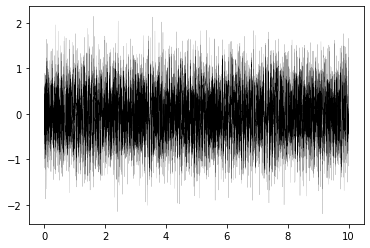

In [28]:
%matplotlib inline
plt.plot(t,th,'k-',lw=0.1);

In [29]:
data = fileI("PSD_full.txt");
data1 = fileI("PSD_band1.txt");
data2 = fileI("PSD_band2.txt");
data3 = fileI("PSD_ovl_band1.txt");
data4 = fileI("PSD_ovl_band2.txt");

C:\Users\OWNER\AppData\Local\Temp/ipykernel_14452/4169597666.py:9: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out[i,:] = np.array(tmp[i].split()).astype(np.float)


In [30]:
fi,pi=data[:,0],data[:,1];
fi1,pi1 = data1[:,0],data1[:,1];
fi2,pi2 = data2[:,0],data2[:,1];
fi3,pi3 = data3[:,0],data3[:,1];
fi4,pi4 = data4[:,0],data4[:,1];


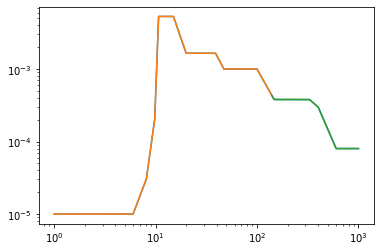

In [31]:
plt.loglog(fi,pi);
plt.loglog(fi1,pi1);
plt.loglog(fi2,pi2);

In [32]:
ft = np.logspace(0,3,100);

In [33]:
fn,fd=th2fds_smallwood(lftab=ft,ldtab=th,dr=0.04,dtime=5e-4,it=1,K=1,m=8,C=1);
fn1,fd1=th2fds_smallwood(lftab=ft,ldtab=th1,dr=0.04,dtime=5e-4,it=1,K=1,m=8,C=1);
fn2,fd2=th2fds_smallwood(lftab=ft,ldtab=th2,dr=0.04,dtime=5e-4,it=1,K=1,m=8,C=1);

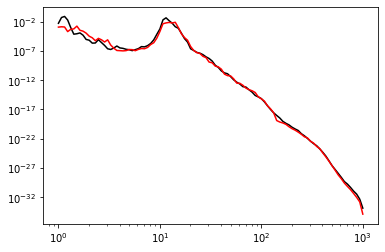

In [34]:
plt.loglog(fn,fd,'k-');
#plt.loglog(fn1,fd2);
#plt.loglog(fn2,fd2);
plt.loglog(fn,fd1+fd2,'r-');

In [35]:
fn3,fd3=th2fds_smallwood(lftab=ft,ldtab=th3,dr=0.04,dtime=5e-4,it=1,K=1,m=8,C=1);
fn4,fd4=th2fds_smallwood(lftab=ft,ldtab=th4,dr=0.04,dtime=5e-4,it=1,K=1,m=8,C=1);

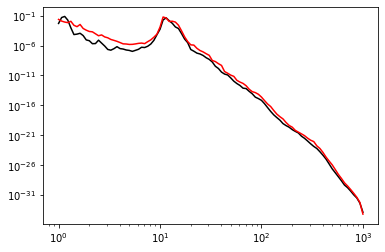

In [36]:
plt.loglog(fn,fd,'k-');
#plt.loglog(fn3,fd3);
#plt.loglog(fn4,fd4);
plt.loglog(fn,fd3+fd4,'r-');

In [37]:
rD=fd/(fd1+fd2);
rD1=fd/(fd3+fd4);

In [38]:
fileO(fn,fd,"FDS_th_full.txt");
fileO(fn1,fd1,"FDS_th_band1.txt");
fileO(fn2,fd2,"FDS_th_band2.txt");
fileO(fn3,fd3,"FDS_th_ovl_band1.txt");
fileO(fn4,fd4,"FDS_th_ovl_band2.txt");